In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model


In [6]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model')

In [7]:
from inltk.tokenizer import MalyalamTokenizer

In [8]:
MalyalamTokenizer

inltk.tokenizer.MalyalamTokenizer

In [9]:
# class MalyalamTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [10]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [11]:
# 10,000 is the vocab size that we chose in sentencepiece
malyalam_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=malyalam_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [17]:
data_lm.show_batch()

idx,text
0,ിക യിൽ ▁ഉൾപ്പെടുത്തിയ ിരിക്കുന്നത് . ▁സീ ബോ ൾഡ് സ് ▁ബീച്ച് ▁എന്ന യിനം ▁ബീ ച് ▁വൃക്ഷ ങ്ങൾ ▁നിറഞ്ഞ ▁വന മേഖല യാണ് ▁ഇവിടത്തെ ▁ഒരു ▁പ്രത്യേകത . ▁ശൈത്യകാലത്ത ് ▁പൂർണ്ണമായ ും ▁ഇലപ്പൊ ഴ ിക്കുന്ന ▁ഈ ▁മര ങ്ങൾ ▁ശൈത്യ ത്തിന്റെ ▁അവസാന ത്തോടെ ▁ഒരു ▁ശി ശി ര നി ദ്ര യിൽ നിന്ന െന്നപോലെ ▁ഉ ണ ര ുകയും ▁വീണ്ടും ▁ഇലകൾ ▁ത ളി ർ ക്ക ുവാൻ ▁ആരംഭിക്ക ുകയും ▁ചെയ്യുന്നു . ▁ജപ്പാ ന ിൽനിന്നും ▁ആദ്യമായി ▁ലോകപൈതൃക പട്ട ിക യിൽ
1,സി യാർ ▁അലി ം ▁അക്ബർ ▁സാ നി ▁വാ ലാ ▁ഷാ ൻ ▁പാദ ് ഷാ - ഇ - ബാഹ ് ർ - ഉ - ബാർ ▁എന്നാണ് ▁മുഴുവൻ ▁പേര് . ▁മുഗൾ ▁സാമ്രാജ്യ ത്തിലെ ▁ദുർബല നായ ▁ചക്രവർത്തി യാ യാണ് ▁ഫറൂഖ് ▁സി യാർ ▁വിലയിരുത്ത പ്പെടുന്നത് . ▁ഉപ ജാ പ ക സംഘ ത്തിന്റെ ▁പ്രേരണ യാൽ ▁പല തവണ ▁ഇദ്ദേഹം ▁വഴി തെ റ്റ ുകയും ▁സ്വതന്ത്ര മായി ▁ഭരണം ▁നടത്താൻ ▁സാധിക്ക ാതെ ▁വരികയും ▁ചെയ്തു . ▁ഹ സ്സ ൻ ▁അലി
2,▁പരീക്ഷ യും ▁വിജയിച്ചു . ▁ശ്രീ മൂലം ▁തിരുനാൾ ▁ മഹാരാജാവ ് ▁18 90 ൽ ▁എ . ആ റിനെ ▁സംസ്കൃത ▁പാഠ ശാല യിൽ ▁ഇൻ സ് പെ ക്ട റായി ▁നിയമ ിച്ചു . ▁എ . ആർ . ▁ഈ ▁കാലയളവിൽ ▁നിഷ് ക ൃഷ്ട മായ ▁പാഠ ്യ പദ്ധതി യും ▁പാശ്ചാത്യ രീതി യിലുള്ള ▁ശിക്ഷ ാക്രമ വും ▁നടപ്പാക്ക ി . ▁ജോലി ക്കിടയിൽ ▁സംസ്കൃത ത്തിൽ ▁എം . എ . ▁എഴുതിയ െടുത്തു . ▁18 94 ൽ ▁സംസ്കൃത ▁മഹാ പാഠ ശാല
3,• ▁വംശ പത്ര പതി തം • ▁വംശ യ ഷ്ട ിക • ▁വംശ സ്ഥ ം • ▁വ ് യാള ം • ▁ശങ്കര ചര ിത ം • ▁ശ ശ ധര ബി ംബ ം • ▁ശശി കല • ▁ശശി കല • ▁ശ ാ ർദ്ദ ൂ ല വി ക്രീ ഡി തം • ▁ ശാല ിനി • ▁ശിഖര ിണി • ▁ശിവ ം • ▁ശി താ ഗ്ര • ▁ശുദ്ധ വി രാ ൾ • ▁ശിശു ഭ ൃത
4,ശ ിക്കാൻ ▁തുടങ്ങി . ▁ഈ ▁സമയത്ത് ▁തന്റെ ▁തോ ക്കിൽ ▁നിന്ന് ▁മംഗൽ ▁സ്വയം ▁വെടി യു തി ർ ക്കാൻ ▁ശ്രമിച്ച െങ്കിലും ▁പരാജയപ്പെട്ടു . ▁നി സ് സാര മായ ▁പര ു ക്ക േറ്റ ▁മംഗൽ ▁പാണ്ഡേ യെ ▁അറസ്റ്റ് ▁ചെയ്തു . ▁ബംഗാൾ ▁സൈന്യ ത്തിൽ ▁പുതിയ തായി ▁എത്തിയ ▁എൻ ഫീൽഡ ് - പി - 53 ▁തോ ക്ക ുകളിൽ ▁ഉപയോഗിക്കുന്ന ▁തിര കള െക്കുറിച്ചുള്ള ▁ദു രീ കരിക്ക ാത്ത ▁സംശയ ങ്ങളായിരുന്നു ▁മംഗൽ ▁പാണ്ഡേ യുടെ ▁പെരു മാറ്റ ത്തിനു ▁കാരണമായി ▁ചൂണ്ടിക്കാണിക്ക ുന്നത്


In [18]:
len(data_lm.vocab.itos)

10000

In [19]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [20]:
gc.collect()

20

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


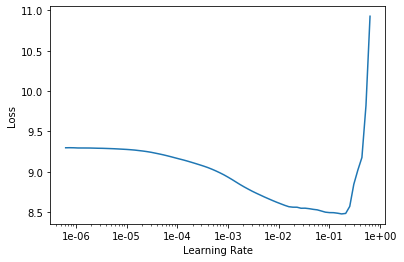

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(10, 1e-3, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.046136,6.003250,0.162352,07:06
1,5.278991,5.199069,0.218601,07:06
2,4.656730,4.643428,0.269000,07:06
3,4.331246,4.308517,0.302279,07:05
4,4.174603,4.037917,0.329496,07:06
5,3.875300,3.807956,0.358188,07:06
6,3.691141,3.624789,0.382253,07:05
7,3.418057,3.463205,0.406483,07:06
8,3.196044,3.375967,0.419933,07:07
9,3.077571,3.360451,0.422671,07:06


Better model found at epoch 0 with accuracy value: 0.16235168278217316.
Better model found at epoch 1 with accuracy value: 0.21860076487064362.
Better model found at epoch 2 with accuracy value: 0.2690003216266632.
Better model found at epoch 3 with accuracy value: 0.3022788166999817.
Better model found at epoch 4 with accuracy value: 0.3294961452484131.
Better model found at epoch 5 with accuracy value: 0.3581877648830414.
Better model found at epoch 6 with accuracy value: 0.3822525143623352.
Better model found at epoch 7 with accuracy value: 0.4064827263355255.
Better model found at epoch 8 with accuracy value: 0.4199325740337372.
Better model found at epoch 9 with accuracy value: 0.422670841217041.


In [24]:
learn.fit_one_cycle(5, 1e-4, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model2')])

epoch,train_loss,valid_loss,accuracy,time
0,3.148885,3.349959,0.424629,07:04
1,3.162382,3.324064,0.428683,07:05
2,3.161486,3.290035,0.434570,07:05
3,2.997787,3.264377,0.438639,07:05
4,2.915110,3.259619,0.439587,07:06


Better model found at epoch 0 with accuracy value: 0.42462852597236633.
Better model found at epoch 1 with accuracy value: 0.4286832809448242.
Better model found at epoch 2 with accuracy value: 0.43456965684890747.
Better model found at epoch 3 with accuracy value: 0.43863922357559204.
Better model found at epoch 4 with accuracy value: 0.4395868182182312.


In [25]:
TEXT = "ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി"
N_WORDS = 40
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ▁എന്ന ▁പേരിൽ ▁അറിയപ്പെടുന്ന ▁ജാ ഫർ ▁സ ക ാനി ഫി ക് ▁കമ്പനി ക്ക് ▁നേതൃത്വം ▁നൽകിയ ▁സേവന മാണ് ▁ഫ ഗ് ▁ റിയ . ▁. ആ ത് മ നാ ഭ വർമ്മ യുടെ ▁നേതൃത്വത്തിൽ ▁ഇന്ത്യയിലെ ▁മൂന്നു ▁ജില്ല കളായി ▁വിഭജിച്ച ് , ▁പഞ്ചാബ് , ▁ഹരിയാന
ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി യും ▁പ വ ▁കടയ്ക്കൽ ▁ഭരണ ത്തിനെതിരെ യുള്ള ▁ഒരു ▁ഇന്ത്യൻ ▁ഭരണ സം ഭവ മാണ് ▁ഫി സ ൽ ▁അസ ം . ▁. ഇ തി ർ ▁ ഥ േ ര വാദ ▁ഈ ▁വിഭാഗ ത്തിന്റെ ▁മാ പ്പു വഴി യാണ് ▁പ്രധാനമായും ▁ശിപായി മാർ ▁എന്ന് ▁അറിയപ്പെടുന്നത്


In [27]:
np.exp(3.25)

25.790339917193062

In [28]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [29]:
# Generating embedding vectors for visualization

In [30]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model')

In [31]:
defaults.device = torch.device('cpu')

In [32]:
# learn = load_learner(path / 'MalyalamDataset/')

In [35]:
encoder = get_model(learn.model)[0]

In [36]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([10000, 410])

In [37]:
embeddings = encoder.state_dict()['encoder.weight']

In [38]:
embeddings = np.array(embeddings)

In [39]:
embeddings[0].shape

(410,)

In [40]:
df = pd.DataFrame(embeddings)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,0.036030,-0.233823,0.165436,0.232610,-0.027157,-0.255889,-0.157448,0.304890,0.010245,0.149751,...,0.221098,0.110326,-0.166955,0.060656,-0.039286,-0.102857,-0.154750,0.071319,-0.287154,-0.146374
1,-0.288375,0.195335,0.130055,-0.289455,0.251860,-0.064411,0.224859,0.058616,-0.069197,-0.087954,...,-0.323585,0.028612,-0.217118,-0.301141,-0.152953,0.137157,-0.027333,-0.050628,0.154908,-0.041128
2,-0.296903,0.172818,0.115393,-0.287370,0.248925,-0.062623,0.231034,0.056768,-0.073595,-0.080606,...,-0.338418,0.031345,-0.228342,-0.311688,-0.164838,0.148972,-0.027800,-0.048957,0.162479,-0.006186
3,0.269789,-0.280955,0.406444,0.065825,0.104121,-0.268758,-0.088995,-0.117879,0.173256,-0.018210,...,0.343819,0.245318,-0.024108,0.306143,0.100854,-0.223558,-0.362481,-0.200894,-0.102091,-0.271015
4,-0.055737,0.325437,-0.168685,0.155597,-0.132933,-0.084405,0.159368,-0.189636,0.112756,0.215854,...,0.276563,0.053458,0.088126,-0.170833,0.159408,-0.358251,-0.140460,-0.117527,-0.064717,-0.118483


In [42]:
df.shape

(10000, 410)

In [43]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [44]:
df2 = pd.DataFrame(itos)

In [45]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,്


In [46]:
df2.shape

(10000, 1)

In [47]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [48]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.8838e-01,  1.9534e-01,  1.3005e-01, -2.8946e-01,  2.5186e-01,
        -6.4411e-02,  2.2486e-01,  5.8616e-02, -6.9197e-02, -8.7954e-02,
        -2.1713e-01, -3.0053e-01,  1.8226e-02,  2.5914e-01, -9.8454e-02,
         1.0505e-01, -4.4822e-02,  1.6573e-01,  1.7450e-01, -1.0521e-01,
         2.3799e-01, -1.1365e-01, -5.5788e-04, -1.8098e-01,  2.3345e-01,
        -3.9576e-01, -2.7768e-01,  1.2207e-01,  2.0038e-02,  3.5984e-01,
         3.5331e-02, -1.8174e-02,  2.9681e-01,  2.0294e-01, -8.7180e-02,
        -2.5348e-01, -2.2914e-01,  1.2741e-01, -9.5824e-02, -1.2549e-01,
        -1.3070e-01,  2.3285e-01, -6.4115e-04, -1.6414e-01,  3.2314e-02,
         4.8819e-02, -3.2767e-02,  1.8885e-01,  2.4161e-02,  6.0405e-02,
        -5.3400e-01, -5.7614e-02,  1.7913e-03,  1.7609e-02,  1.3095e-01,
         2.2092e-01, -2.9997e-01,  2.3730e-01,  1.6538e-01, -5.6922e-02,
        -1.7874e-01, -4.7354e-01,  2.5619e-01,  3.8571e-02,  4.3480e-02,
        -1.2724e-02,  2.6596e-01, -1.9775e-01, -2.3